# Rakuten Data Exploration

## Importing text data

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

sns.set()

### Features variables

In [192]:
df_X = pd.read_csv('./datasets/X_train_update.csv', index_col = 0)

print("nb_entries, nb_columns = ", df_X.shape)
display(df_X.head())

nb_entries, nb_columns =  (84916, 4)


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


### Target variable

In [193]:
df_y = pd.read_csv('./datasets/Y_train_CVw08PX.csv', index_col = 0)

print(print("nb_entries, nb_columns = ", df_y.shape))
display(df_y.head())

nb_entries, nb_columns =  (84916, 1)
None


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


## Data Exploration
* Variable types, role (feature/target), nature (cathegorical/quantitative).  
* Percentage of missing values  
* Distribution of values for quantitative variables: Statistical description.  
* Relevant cathegories of Cathegorical variables.  

### Feature variables: datatypes & missing values

In [194]:
## Let's see the variable types
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [195]:
## The only feature with missing values is 'descriptionid'

## Amount of missing values in the 'descriptionid':
nb_missingDescr = df_X['description'].isna().sum()

print(f'There are {nb_missingDescr} ({round(nb_missingDescr/df_X.shape[0]*100,2)} %) elements without a description')

There are 29800 (35.09 %) elements without a description


### Feature engineering: title_descr

In [196]:
## Rename the variable 'designation' by 'title' which is more convenient
df_X.rename({'designation':'title'}, axis = 1, inplace = True)
df_X.columns

Index(['title', 'description', 'productid', 'imageid'], dtype='object')

In [197]:
## Replace NaN's in description with empty string
df_X['description'] = df_X['description'].fillna('')

## Concatenate 'title' with 'description'
df_X['title_descr'] = df_X['title'] + '\n' + df_X['description']

df_X.head()

,title,description,productid,imageid,title_descr
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des Tuques\nLuc a des id&eacute;es d...


In [198]:
## check the first element having a concatenation with empty string.
print(df_X[df_X['description']==''].loc[0,'title'])
print(df_X[df_X['description']==''].loc[0,'description'])
print(df_X[df_X['description']==''].loc[0,'title_descr'])

Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design

Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design



### Feature Engineering: character-length

In [199]:
## Let's measure the length for variables 'designation' and 'description' in term of the number of charaters

df_X['title_char_len'] = [len(title) for title in df_X['title'] ]
df_X['descr_char_len'] = [len(text) if pd.notnull(text) else 0 for text in df_X['description'] ]

df_X.head()

,title,description,productid,imageid,title_descr,title_char_len,descr_char_len
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...,88,0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,206,0
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,76,760
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...,63,0
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des Tuques\nLuc a des id&eacute;es d...,20,213


### Feature Engineering: word_lenght

In [200]:
import nltk
#nltk.download()   ## pop-up a window to select which package to download
#nltk.download('popular')   ## download package 'popular'
from nltk.tokenize import word_tokenize

## Try for one example
idx_example = 4

print("Verify concatenation: title + description: \n------------------------------------------")
print("Title: \n\t", df_X.loc[idx_example,'title'],'\n')
print("Description: \n\t", df_X.loc[idx_example,'description'],'\n')
print("Concatenated Text: \n\t", df_X.loc[idx_example,'title_descr'],'\n')

print('\n\n')

print("Tokenize text and count tokens: \n-------------------------------")
print("Token lenght = ", len(word_tokenize(df_X.loc[idx_example,'title_descr'])))
print("Tokens = ", word_tokenize(df_X.loc[idx_example,'title_descr']))

print('\n\n')

print("HTML parsed text: \n-----------------")
from bs4 import BeautifulSoup
soup = BeautifulSoup(df_X.loc[idx_example,'title_descr'])
print(soup.get_text(),'\n')

print("Token lenght = ", len(word_tokenize(soup.get_text())) )
print("Tokens in HTML parsed text: \n", word_tokenize(soup.get_text()))

print('\n\n')

print("tokenize with regex (remove puntuations): \n---------------------------------")
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

print("Token lenght = ", len(tokenizer.tokenize(df_X.loc[idx_example,'title_descr'])))
print("Regex Tokenization of Text: \n", tokenizer.tokenize(df_X.loc[idx_example,'title_descr']) , '\n' )

print("Token lenght = ", len(tokenizer.tokenize(soup.get_text()) ) )      
print("Regex Tokenization of HTML parsed text: \n", tokenizer.tokenize(soup.get_text()) , '\n'  )


Verify concatenation: title + description: 
------------------------------------------
Title: 
	 La Guerre Des Tuques 

Description: 
	 Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans... 

Concatenated Text: 
	 La Guerre Des Tuques
Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans... 




Tokenize text and count tokens: 
-------------------------------
Token lenght =  55
Tokens =  ['La', 'Guerre', 'Des', 'Tuques', 'Luc', 'a', 'des', 'id', '&', 'eacute', ';', 'es', 'de', 'grandeur', '.', 'Il', 'veut', 'organiser', 'un', 'jeu', 'de', 'guerre', 'de', 'boules', 'de', 'neige', 'et', "s'arranger", 'pour', 'en', '&', 'ecirc', ';', 'tre', 'le', 'vainqueur', 'incontest', '&', 

**Observations**
* text is HTML encoded (from webscrapping probably)----->> Need to parse to get rid off: 
     * tags words 
     * encoded characters such that ('id', '&', 'eacute', ';', 'es') is understood as 'idées' (idx_example = 4)
* word_tokenize separate punctuation symbols from words even if no space between them (good)
* understand date format as a single token (good)
* considers elided words as a single token such as "de"+"art" = "d'art". Also the case for "l'écran"
* concatenated words by '-' are a single token such as 'SL-3468-BE'

**To do:**   
[x] does not recognize tag '< br>' (without the inner space) as line break in the description: replace HTML tag by string linebreak '\n' before tokenizing

**Feature engineering steps:**  
1- HTML parse Text and lower case.  
2- Tokenize with RegexpTokenizer.  
3- Measure Token lenght.  

In [201]:
df_X.columns

Index(['title', 'description', 'productid', 'imageid', 'title_descr',
       'title_char_len', 'descr_char_len'],
      dtype='object')

In [202]:
### HTML parse Text and lower case all
from bs4 import BeautifulSoup

df_X['title_descr'] = [BeautifulSoup(text).get_text().lower() for text in df_X.loc[:,'title_descr']]
#df_X.head()

C:\Users\19rod\AppData\Local\Temp\ipykernel_3048\1096094544.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_X['title_descr'] = [BeautifulSoup(text).get_text().lower() for text in df_X.loc[:,'title_descr']]


In [203]:
df_X.loc[4,'title_descr']

"la guerre des tuques\nluc a des idées de grandeur. il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. mais sophie s'en mêle et chambarde tous ses plans..."

In [204]:
## Regexp Tokenization: get token list and Nb_of tokens
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

df_X['tokens'] = [tokenizer.tokenize(soup_text) for soup_text in df_X.loc[:,'title_descr']]
df_X['text_token_len'] = [len(token_list) for token_list in df_X['tokens'] ]



In [205]:
## verify
idx = 4
print(df_X.loc[idx,'title_descr'],'\n')
print(df_X.loc[idx,'tokens'],'\n')
print(df_X.loc[idx,'text_token_len'],'\n')

la guerre des tuques
luc a des idées de grandeur. il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. mais sophie s'en mêle et chambarde tous ses plans... 

['la', 'guerre', 'des', 'tuques', 'luc', 'a', 'des', 'idées', 'de', 'grandeur', 'il', 'veut', 'organiser', 'un', 'jeu', 'de', 'guerre', 'de', 'boules', 'de', 'neige', 'et', 's', 'arranger', 'pour', 'en', 'être', 'le', 'vainqueur', 'incontesté', 'mais', 'sophie', 's', 'en', 'mêle', 'et', 'chambarde', 'tous', 'ses', 'plans'] 

40 



### Feature engineering : Language

## Descriptive Statistics

### 'text_token-length' distribution 
Histogram of token-lengh extracted from variable 'title_descr' or  
Distribution of number of tokens in varibale 'tokens'

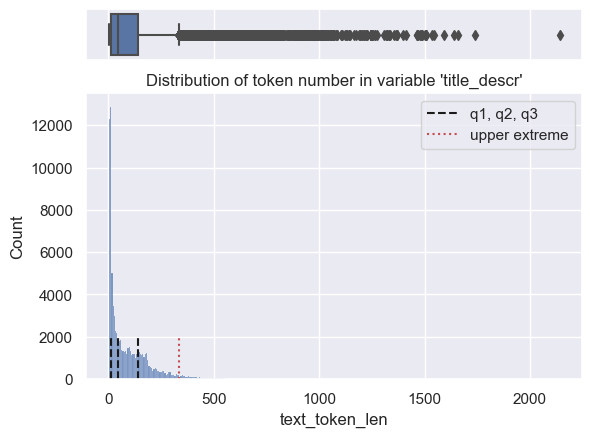

In [206]:
# quantile values
q1, q2, q3 = df_X['text_token_len'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.title("Distribution of token number in variable 'title_descr'")

## Box plot
sns.boxplot(x = df_X.text_token_len, ax = ax_box)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## hist plot
sns.histplot(x = df_X.text_token_len, ax = ax_hist)#, kde = True

# add quantiles and extreme values markers
ax_hist.axvline(x=q1, ymin= 0, ymax = 0.15, c='k', ls = '--', label='q1, q2, q3')
ax_hist.axvline(x=q2, ymin= 0, ymax = 0.15, c='k', ls = '--')
ax_hist.axvline(x=q3, ymin= 0, ymax = 0.15, c='k', ls = '--')
ax_hist.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.15, c='r', ls = ':', label='upper extreme')

ax_hist.legend()
plt.show()

In [207]:
##descriptive statistics
df_X['text_token_len'].describe()

count    84916.000000
mean        92.272328
std        117.692772
min          2.000000
25%         11.000000
50%         47.000000
75%        140.000000
max       2141.000000
Name: text_token_len, dtype: float64

### Character-length distribution for existing variables 'description'
The character lenght is not so important, since it higly depends on the language.

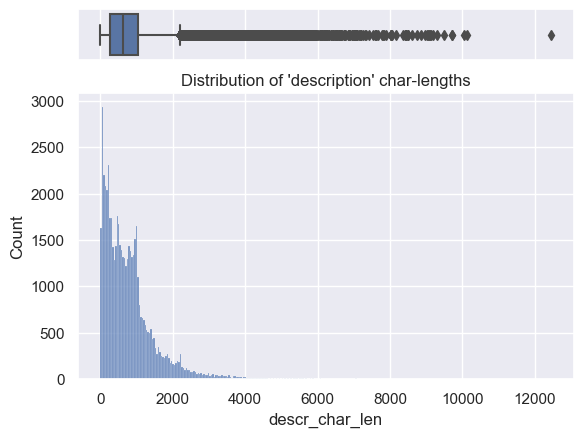

In [208]:
## filter entris with an existing description
df_X_description = df_X[ df_X['descr_char_len'] != 0 ]


fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={"height_ratios":(.15,.85)})
plt.title("Distribution of 'description' char-lengths")

## Box plot (outliers)
sns.boxplot(x = df_X_description.descr_char_len, ax = ax_box)
ax_box.set(xlabel='')

## hist plot
sns.histplot(x = df_X_description['descr_char_len'], ax = ax_hist);

In [209]:
##descriptive statistics
df_X_description['descr_char_len'].describe()

count    55116.000000
mean       808.171692
std        805.462153
min          1.000000
25%        259.000000
50%        626.000000
75%       1034.000000
max      12451.000000
Name: descr_char_len, dtype: float64

### Data Normality test: QQ plot

The Token-length and the char-length are higly assymetric so probably are not normally distributed.  
There is also no reason for them to be normally distributed.  
Let's probe this with a normality test:  

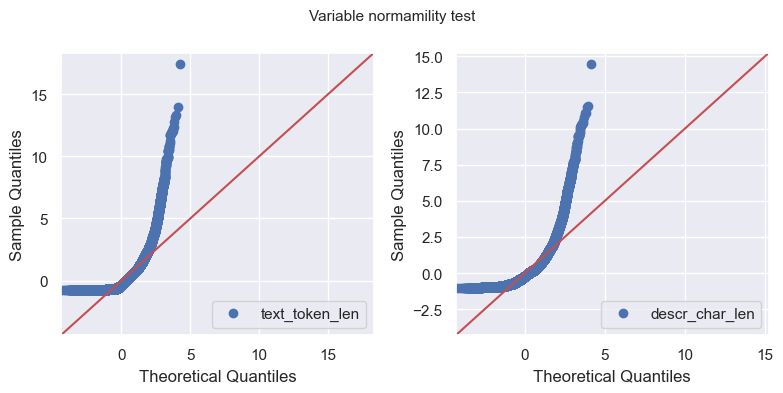

In [210]:
import statsmodels.api as sm

figure, axs = plt.subplots(1, 2, figsize=(8,4))
figure.suptitle('Variable normamility test', fontsize=11) #, fontweight='bold'

sm.qqplot(df_X['text_token_len'], ax = axs[0], fit=True, line='45', label ='text_token_len')
axs[0].legend(loc ='lower right')

sm.qqplot(df_X_description['descr_char_len'], ax = axs[1], fit=True, line='45', label ='descr_char_len')
axs[1].legend(loc ='lower right')

plt.tight_layout()
plt.show()

### Target variable: Product type code

In [211]:
## unique categories represented in the training dataset
df_y['prdtypecode'].unique().shape[0]

27

In [212]:
## most represented product type codes
top_categories = df_y.value_counts().sort_values(ascending = False).head(10)
top_categories

prdtypecode
2583           10209
1560            5073
1300            5045
2060            4993
2522            4989
1280            4870
2403            4774
2280            4760
1920            4303
1160            3953
dtype: int64

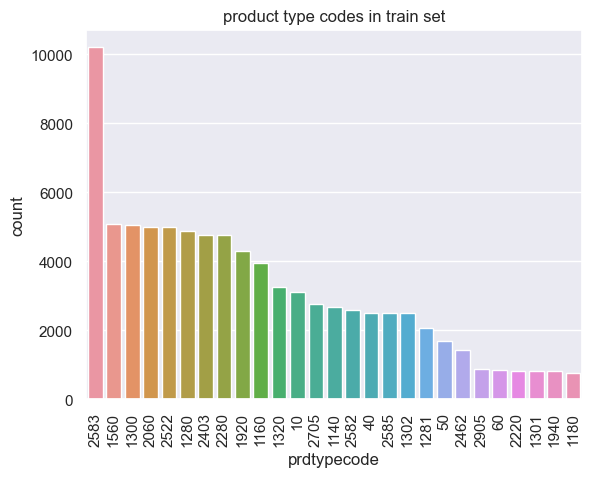

In [213]:
## Counts per cathegory in the whole train dataset.

sns.countplot(x = 'prdtypecode', data = df_y , order = df_y['prdtypecode'].value_counts().index)#
plt.xticks(rotation = 90)
plt.title('product type codes in train set')
plt.show()

In [214]:
print(f'The Dominant cathegory has prdtypecode {2583}, with about 10k items.')

The Dominant cathegory has prdtypecode 2583, with about 10k items.


In [215]:
## Some exmaples of the most represented class:

cat2583 = df_X[ df_y.prdtypecode == 2583]
cat2583[['title_descr']].head()
#cat2583.head()

,title_descr
20,kit de désinfection pour piscines enfants 20990\n
39,bouée gonflable river tube - oogarden\nbouée g...
53,testeur électronique de ph\nutilisation du tes...
58,pompe de filtration speck badu 95\n
64,astralcom 1 cv mono de dab - surpresseur pisci...


### Loading some images of the most represented category

./datasets/image_train/image_1268740880_product_3936362802.jpg
(500, 500, 3)


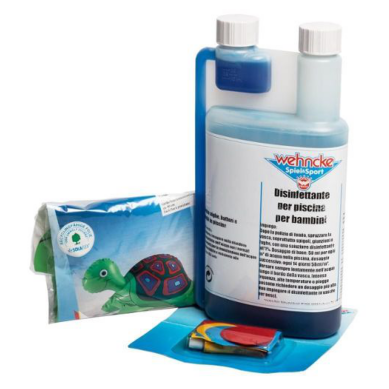

In [216]:
im_idx = 20

file = "./datasets/image_train/image_"+str(cat2583.loc[im_idx,'imageid'])+"_product_"+str(cat2583.loc[im_idx,'productid'])+".jpg"
print(file)
image = cv2.imread(file)
image = np.int64(image)
print(image.shape)

_ = plt.imshow(image[:,:,::-1])
_ = plt.axis("off")

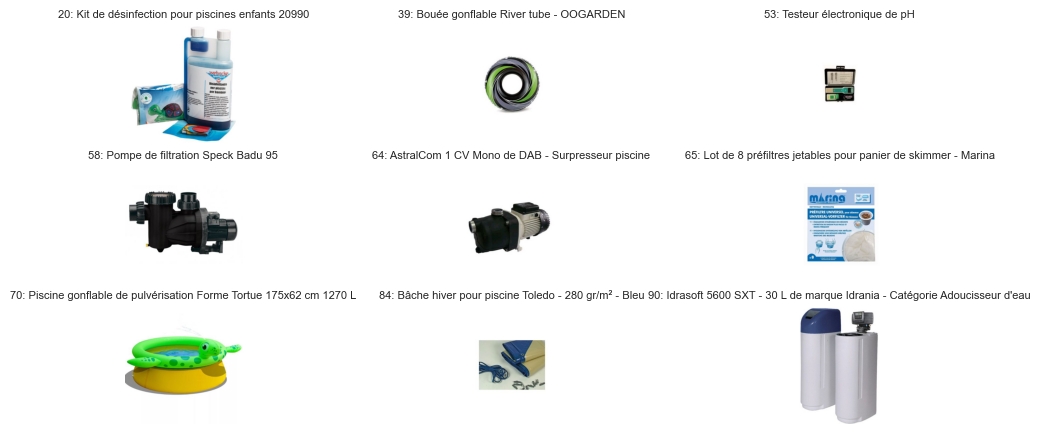

In [217]:
nb_items = 9

fig = plt.figure(figsize=(12, 7))

columns = 3
rows = len( cat2583.head(nb_items).index ) //columns + 1
path = "./datasets/image_train/image_"

for i,idx in enumerate(cat2583.head(nb_items).index):
    file = path + str(cat2583.loc[idx,'imageid'])+"_product_"+str(cat2583.loc[idx,'productid'])+".jpg"
    
    img = cv2.imread(file)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")
    plt.title(str(idx)+": "+cat2583.loc[idx,'title'], size=8, wrap = True)
    #plt.title("\n".join(wrap( str(idx)+": "+cat2583.loc[idx,'title'], 50)), size=8)
    
plt.show()


**Distribution of product designation lenght for cat 2583**

In [218]:
df_X.columns

Index(['title', 'description', 'productid', 'imageid', 'title_descr',
       'title_char_len', 'descr_char_len', 'tokens', 'text_token_len'],
      dtype='object')

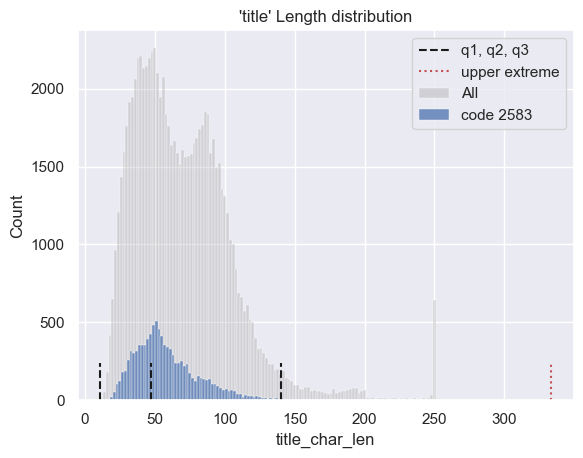

In [219]:
## Length distribtion for variable 'designation' 

plt.title("'title' Length distribution")

## hist plot
bin_width = 2
sns.histplot(x = 'title_char_len', data = df_X, color='grey', binwidth = bin_width, label = 'All', alpha = 0.25)
sns.histplot(x = 'title_char_len', data = cat2583, binwidth = bin_width, label = 'code 2583')

# add quantiles and extreme values markers
plt.axvline(x=q1, ymin= 0, ymax = 0.1, c='k', ls = '--', label='q1, q2, q3')
plt.axvline(x=q2, ymin= 0, ymax = 0.1, c='k', ls = '--')
plt.axvline(x=q3, ymin= 0, ymax = 0.1, c='k', ls = '--')
plt.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.1, c='r', ls = ':', label='upper extreme')

plt.legend()
plt.show()

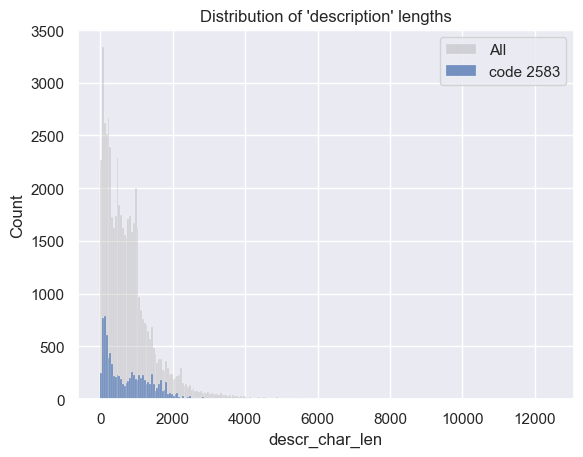

In [220]:
## length distribution for exsiting variables 'description' 

## filter entris with an existing description
#df_X_description = df_X[ df_X['description_len'] != 0 ]


plt.title("Distribution of 'description' lengths")

## hist plot
bin_width = 50
sns.histplot(x = 'descr_char_len', data = df_X_description, \
             binwidth = bin_width, color = 'grey', alpha = 0.25, label = 'All')
sns.histplot(x = 'descr_char_len', data = cat2583[ cat2583['descr_char_len'] != 0 ], \
             binwidth = bin_width, label = 'code 2583')
plt.legend();        

### Correlations

**Is there a correlation between text_token_len (numerical) and prdtypecode (categorical) ??**  
* Lets plot a boxplot for each category
* Let's run an ANOVA test to check

In [221]:
## merge dataframe on indexes
df_data = pd.merge(df_y,df_X,left_index = True, right_index = True)
print(df_data.shape)
display(df_data.head())


(84916, 10)


,prdtypecode,title,description,productid,imageid,title_descr,title_char_len,descr_char_len,tokens,text_token_len
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,88,0,"[olivia, personalisiertes, notizbuch, 150, sei...",11
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,206,0,"[journal, des, arts, le, n, 133, du, 28, 09, 2...",38
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,76,760,"[grand, stylet, ergonomique, bleu, gamepad, ni...",120
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,63,0,"[peluche, donald, europe, disneyland, 2000, ma...",8
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,la guerre des tuques\nluc a des idées de grand...,20,213,"[la, guerre, des, tuques, luc, a, des, idées, ...",40


In [222]:
# ## Box plot
# figure, axs = plt.subplots(2, 1, figsize=(8,6))
# figure.suptitle('Length distributions per code type', fontsize=11, fontweight='bold')

# sns.boxplot(x = 'prdtypecode', y ='text_token_len', data = df_data, ax = axs[0])#, kind = 'box', height=4, aspect=2
# axs[0].set_xticks([])

# sns.boxplot(x = 'prdtypecode', y ='text_token_len', data = df_data, ax = axs[1])
# plt.xticks(rotation = 90);


In [223]:
order = df_data[['prdtypecode','text_token_len']].groupby('prdtypecode')['text_token_len'].mean().sort_values(ascending=False)
order.head()

prdtypecode
2905    363.650229
2060    172.763669
1560    150.772324
2585    142.943109
2582    140.210892
Name: text_token_len, dtype: float64

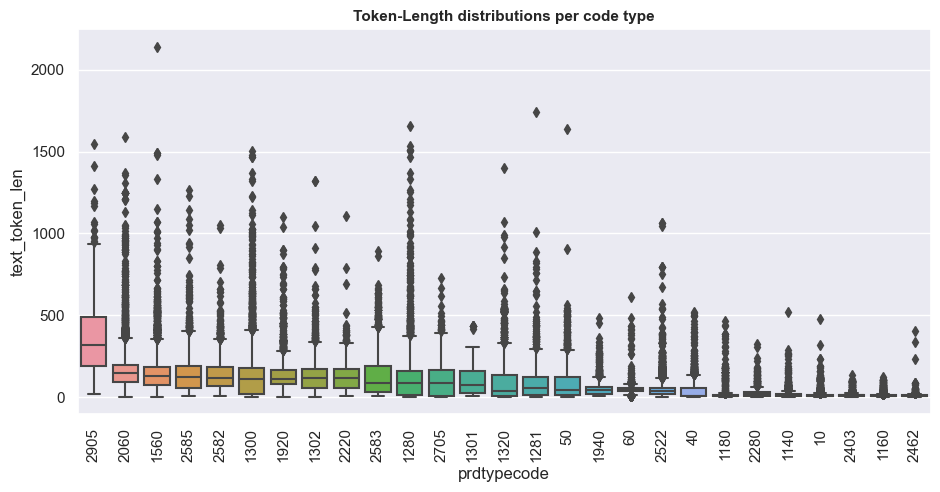

In [224]:
## Box plot

plt.figure(figsize=(11,5))
plt.title('Token-Length distributions per code type', fontsize=11, fontweight='bold')

sns.boxplot(x = 'prdtypecode', y ='text_token_len', data = df_data, order = order.index)
plt.xticks(rotation = 90);

## It seems that the type of distribution, the symmetry, the amount of extreme values, depends on the product type code.
## Notice for example products type code 2220 (balanced) vs products type code 10 (skewed).

### ANOVA test
**We can make an hyphoteses (H1) that there are certain type of products for which the description or designation is simpler, so the description is shorter. Hence make the hypothesys that there is a correlation**

In [225]:
H0 = "There is NO correlation between 'text_token_len' and 'prdtypecode'"
H1 = "There is a correlation between  'text_token_len' and 'prdtypecode'"

In [226]:
# Import the library
import statsmodels.api

## Realize the ANOVA test and display the results
## Try 'title_char_len', 'descr_char_len' or 'text_token_len'
result = statsmodels.formula.api.ols('title_char_len ~ prdtypecode', data=df_data).fit()
table = statsmodels.api.stats.anova_lm(result)

# get p-val an evaluate criteria
display(table)
p_val_anova = table.loc['prdtypecode','PR(>F)']

# evaluation
alpha = 0.05
def p_val_evaluation(p_val, alpha):
    if p_val >= alpha:
        print("H0 is not rejected")
    else:
        print("H0 is rejected, H1 is accepted")

p_val_evaluation(p_val_anova,alpha)
print("ANOVA p-value = ", p_val_anova)

,df,sum_sq,mean_sq,F,PR(>F)
prdtypecode,1.0,7.130175e+04,71301.750799,52.701757,3.915506e-13
Residual,84914.0,1.148826e+08,1352.929302,NaN,NaN


H0 is rejected, H1 is accepted
ANOVA p-value =  3.915506426177478e-13


The p-val = 0 is obtained either we mesure the correlation of 'prdtypecode' with 'text_token_len' or 'descr_char_len'.  
A larger p-val = 39e-13, but still $<$alpha, is obtained when for the correlation with 'title_char_len' 


### Most common words per category
* Aggregate 'tokens' per category
* Remove stop words
* Get most common words

**Product Class Datafram**

In [339]:

prd_code_dict = {'prdtypecode': sorted(list(df_y['prdtypecode'].unique()))}
product_class = pd.DataFrame(prd_code_dict)

product_class['prdtypecode'] = product_class['prdtypecode'].astype('str')
product_class.head()

,prdtypecode
0,10
1,40
2,50
3,60
4,1140


**Create a pool of token per category**

In [249]:
## Create a pool of tokens for each category
cat_tokens = {}
for categ in set(df_data['prdtypecode']):
    token_pool = []
    
    for token_list in df_data[df_data['prdtypecode'] == categ]['tokens']:
        token_pool += token_list  
        
    cat_tokens[str(categ)] = token_pool

Veirfications:

In [ ]:
## verify size of 
print("Number of ctagegory pools = ", len(cat_tokens.keys()))
print("Categories :\n ",cat_tokens.keys())

In [255]:
ctg = 1280

## first elements included in the pool
display(df_data[df_data['prdtypecode'] == ctg]['tokens'].head(3))

## number of item in this category
display(df_data[df_data['prdtypecode'] == ctg]['tokens'].shape)

## tokens of element index = 3 in this category
print(df_data[df_data['prdtypecode'] == ctg]['tokens'].loc[3]) 

3     [peluche, donald, europe, disneyland, 2000, ma...
8     [puzzle, scooby, doo, avec, poster, 2x35, pieces]
21    [glitter, beach, barbie, by, barbie, original,...
Name: tokens, dtype: object

(4870,)

['peluche', 'donald', 'europe', 'disneyland', '2000', 'marionnette', 'à', 'doigt']


In [259]:
## verify concatenated tokens of element index = 3 and 8 of cat = ctg
print(df_data.loc[3,'title_descr'])
print(df_data.loc[8,'title_descr'])

## some elements on the pool
print(len(cat_tokens[str(ctg)]))
print(cat_tokens[str(ctg)][:15])

peluche donald - europe - disneyland 2000 (marionnette à doigt)

puzzle scooby-doo avec poster 2x35 pieces

547163
['peluche', 'donald', 'europe', 'disneyland', '2000', 'marionnette', 'à', 'doigt', 'puzzle', 'scooby', 'doo', 'avec', 'poster', '2x35', 'pieces']


**Remove stop words from each pool**

In [362]:
from spacy.lang.fr.stop_words import STOP_WORDS as stop_fr
from spacy.lang.en.stop_words import STOP_WORDS as stop_en

stop = list(stop_fr) + list(stop_en)

for categ, pool in cat_tokens.items():
    cat_tokens[categ] = [token for token in pool if token not in stop]

## Store pool in dataframe
product_class['token_pool'] = product_class['prdtypecode'].map(cat_tokens)
product_class.head()

In [364]:
## verifications

print(len(stop_fr))
print(len(stop_en))
#print(stop_fr)

## verify that len of category ctg 1280 is < 547163
print(len(cat_tokens[str(ctg)]))  

print(cat_tokens.keys())

507
326
356640
dict_keys(['1280', '1281', '1920', '1160', '10', '2060', '2705', '1300', '1940', '2582', '2583', '1560', '1302', '2585', '1301', '1180', '2462', '40', '1320', '2220', '50', '60', '2905', '2522', '2403', '2280', '1140'])


**Count token frequency**

In [361]:
import collections

N_most_common = 100
common_word_dict = {}

for categ, pool in zip(product_class['prdtypecode'],product_class['token_pool']):
    token_counter = collections.Counter(pool).most_common()
    #print(token_counter[:3])
    #print([item[0] for item in token_counter[:3]])
    
    common_word_dict[categ] = [item[0] for item in token_counter[:N_most_common]]

    
## Save into dataframe
product_class['common_words'] = product_class['prdtypecode'].map(common_word_dict)
product_class.head()


,prdtypecode,token_pool,common_words
0,10,"[olivia, personalisiertes, notizbuch, 150, sei...","[tome, livre, edition, 1, 2, histoire, guide, ..."
1,40,"[x, men, 3, movie, lord, thé, rings, shin, mas...","[import, jeu, 1, produit, 2, titres, comprend,..."
2,50,"[grand, stylet, ergonomique, bleu, gamepad, ni...","[jeu, x, 1, nintendo, console, 2, ps4, charge,..."
3,60,"[mini, console, jeux, double, joueurs, 8, bits...","[jeu, console, couleur, écran, jeux, marque, p..."
4,1140,"[power, rangers, rouge, force, mystic, figurin...","[figurine, cm, pop, 1, taille, star, wars, pvc..."


**Observations:**
* Should we remove 1 digit numbers ?  (They are not that much: 10 items)
* Get stop words for most common language (Need to get most common language)